In [4]:
import tensorflow as tf
import os
import cv2

In [5]:
data_dir = 'immagini'

In [6]:
image_exts = ['.jpeg', '.jpg', '.bmp', '.png']

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            file_ext = os.path.splitext(image_path)[1].lower()  
            if file_ext not in image_exts:
                print('Immagine con estensione non valida:', image_path)
                os.remove(image_path)  
        except Exception as e:
            print('Problemi con l\'immagine:', image_path)

Immagine con estensione non valida: immagini\immagini_rumore_esponenziale\A-view-of-the-historic-centre-with-steep-steps-Perugia-Italy-rossiwrites.com_-1024x681.jpg.webp
Immagine con estensione non valida: immagini\immagini_rumore_esponenziale\annucci-in-the-historic-centre-Perugia-Italy-rossiwrites.com-5-1024x681.jpg.webp
Immagine con estensione non valida: immagini\immagini_rumore_esponenziale\Bergamo_Basilica-di-S.Maria-Maggiore-2_TOA.jpg.webp
Immagine con estensione non valida: immagini\immagini_rumore_esponenziale\best-things-to-do-in-bergamo-main-image-hd-op.webp
Immagine con estensione non valida: immagini\immagini_rumore_esponenziale\Boccadasse_Genova_Paolo-Margari-jpg.webp
Immagine con estensione non valida: immagini\immagini_rumore_esponenziale\centro-storico-di-torino-un-gioiello-da-scoprire-exclusive-brands-torino-cover-image-6.webp
Immagine con estensione non valida: immagini\immagini_rumore_esponenziale\Cosa-vedere-a-Perugia-in-un-gorno-680x450.webp
Immagine con estension

In [1]:
import numpy as np
import cv2
import os
import random

def aggiungi_rumore_uniforme_periodico(immagine, periodo=10):
    rumore_uniforme = np.random.randint(0, 256, size=immagine.shape, dtype=np.uint8)
    for i in range(0, immagine.shape[0], periodo):
        for j in range(0, immagine.shape[1], periodo):
            immagine[i:i+periodo, j:j+periodo] += rumore_uniforme[i:i+periodo, j:j+periodo]
    return np.clip(immagine, 0, 255).astype(np.uint8)

# Percorso della directory contenente le immagini originali
directory_immagini_originali = "C:/Users/sgarr/Desktop/progettoMultimedia_v2/immagini/immagini_rumore_uniforme"

# Percorso della directory in cui salvare le immagini con rumore
directory_immagini_con_rumore = "C:/Users/sgarr/Desktop/progettoMultimedia_v2/immagini_v2/immagini_rumorose_uniforme"

# Itera su ogni immagine nella directory delle immagini originali
for filename in os.listdir(directory_immagini_originali):
    # Carica l'immagine originale
    percorso_immagine_originale = os.path.join(directory_immagini_originali, filename)
    immagine_originale = cv2.imread(percorso_immagine_originale)
    if immagine_originale is None:
        print(f"Errore: impossibile leggere l'immagine {percorso_immagine_originale}")
    else: 
        immagine_con_rumore = aggiungi_rumore_uniforme_periodico(immagine_originale)
        if immagine_con_rumore is None:
            print(f"Errore: impossibile elaborare l'immagine {percorso_immagine_originale}")
        else:
            if not os.path.exists(directory_immagini_con_rumore):
                os.makedirs(directory_immagini_con_rumore)
            percorso_immagine_con_rumore = os.path.join(directory_immagini_con_rumore, filename)
            cv2.imwrite(percorso_immagine_con_rumore, immagine_con_rumore)
    

KeyboardInterrupt: 

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [3]:
# Permette di creare una pipeline in maniera efficiente, distinguendo i diversi tipi di rumore.
data = tf.keras.utils.image_dataset_from_directory('immagini_v2')

Found 5249 files belonging to 5 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

In [6]:
batch[0].shape

(32, 256, 256, 3)

In [7]:
# Operazione per scalare i valori tra 0 e 1
data = data.map(lambda x, y: (x/255, y))

In [8]:
scaled_iterator = data.as_numpy_iterator()

In [11]:
batch = scaled_iterator.next()

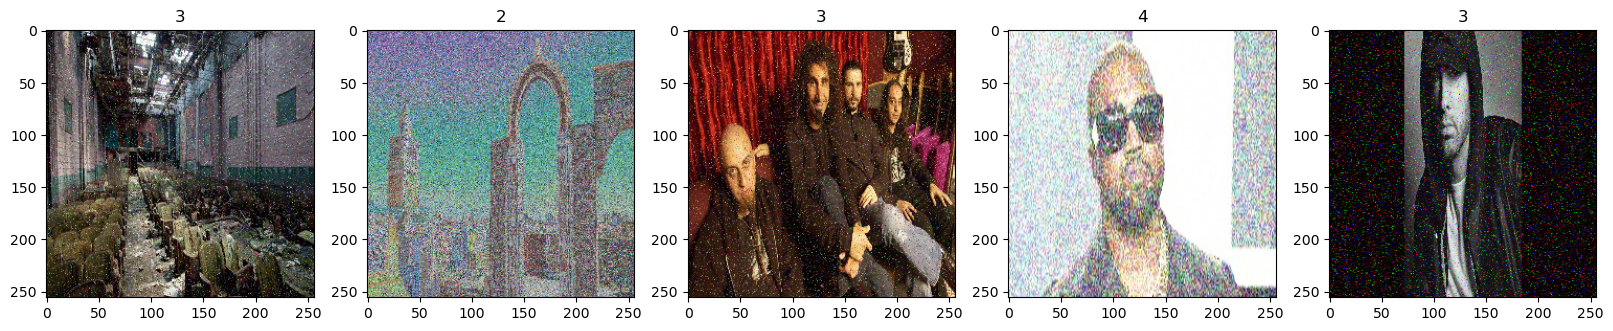

In [12]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    
# Etichetta 0: esponenziale
# Etichetta 1: gaussiano
# Etichetta 2: non uniforme
# Etichetta 3: sale e pepe
# Etichetta 4: uniforme

In [13]:
len(data)

165

In [14]:
train_size = int(len(data)*.6)  
val_size = int(len(data)*.2)     
test_size = int(len(data)*.2)    

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [16]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [17]:
model = Sequential()

In [18]:
# from tensorflow.keras import regularizers

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Riduci la dimensione dei layer densi
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
# Aggiungi Dropout
model.add(layers.Dropout(0.5))

# Aggiungi il layer di output
model.add(layers.Dense(5, activation='softmax'))

In [19]:
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [21]:
logdir = 'logs'

In [22]:
# Salvo passo per passo il modello, posso tornare indietro per verificare come performava
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


99/99 [==============================] - 314s 3s/step - loss: 1.4262 - accuracy: 0.4195 - val_loss: 0.8909 - val_accuracy: 0.6894
Epoch 2/20
99/99 [==============================] - 303s 3s/step - loss: 0.8674 - accuracy: 0.6282 - val_loss: 0.6643 - val_accuracy: 0.7500
Epoch 3/20
99/99 [==============================] - 312s 3s/step - loss: 0.7750 - accuracy: 0.6834 - val_loss: 0.6662 - val_accuracy: 0.7509
Epoch 4/20
99/99 [==============================] - 302s 3s/step - loss: 0.6663 - accuracy: 0.7301 - val_loss: 0.4750 - val_accuracy: 0.8163
Epoch 5/20
99/99 [==============================] - 263s 3s/step - loss: 0.6197 - accuracy: 0.7551 - val_loss: 0.4598 - val_accuracy: 0.8381
Epoch 6/20
99/99 [==============================] - 272s 3s/step - loss: 0.5564 - accuracy: 0.7828 - val_loss: 0.4503 - val_accuracy: 0.8314
Epoch 7/20
99/99 [==============================] - 260s 3s/step - loss: 0.5123 - accuracy: 0.7970 - val_loss: 0.4345 - val_accuracy: 0.8362
Epoch 8/20


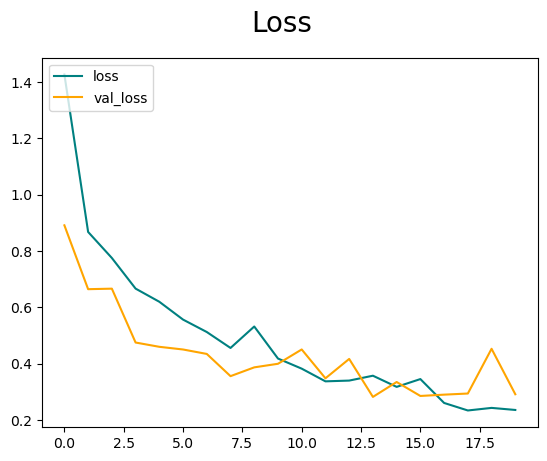

In [24]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

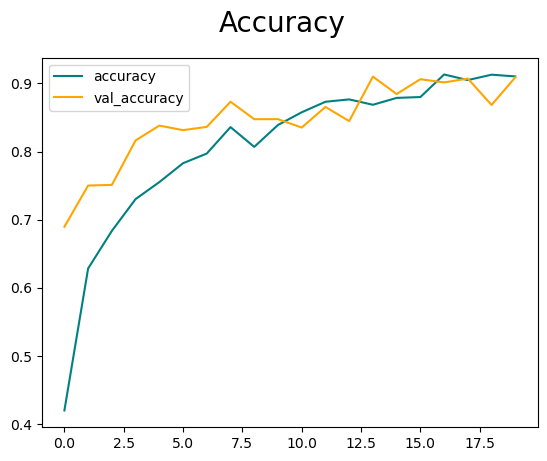

In [25]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [26]:
from tensorflow.keras.metrics import Precision, Recall, F1Score, FalsePositives, AUC

In [27]:
pre = Precision()
re = Recall()
f1 = F1Score()
fp = FalsePositives()
auc = AUC()

In [28]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    y_one_hot = tf.one_hot(y, 5)
    
    pre.update_state(y_one_hot, yhat)
    re.update_state(y_one_hot, yhat)
    f1.update_state(y_one_hot, yhat)
    fp.update_state(y_one_hot, yhat)
    auc.update_state(y_one_hot, yhat)

1/1 [==============================] - 0s 205ms/step


In [29]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, F1:{f1.result().numpy()}, FalsePositives:{fp.result().numpy()}, AUC:{auc.result().numpy()}')

Precision:0.89552241563797, Recall:0.8780487775802612, F1:[0.88329524 0.81548965 0.97709924 0.8        0.9501187 ], Accuracy:0.06497561186552048, FalsePositives:105.0, AUC:0.9851695895195007


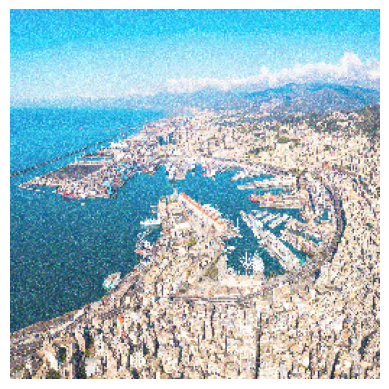

In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt

img_path = 'genova_con_rumore_esponenziale.jpg'
img = tf.io.read_file(img_path)
img = tf.image.decode_jpeg(img, channels=3)  # Decodifica l'immagine in RGB
resized_img = tf.image.resize(img, (256, 256))

# Visualizza l'immagine
plt.imshow(resized_img / 255.0)  # Normalizza i valori dei pixel tra 0 e 1
plt.axis('off')  # Nasconde gli assi
plt.show()

In [33]:
yhat = model.predict(np.expand_dims(resized_img/255, 0))

1/1 [==============================] - 0s 61ms/step


In [34]:
yhat

array([[9.8207283e-01, 7.7549815e-03, 8.0817321e-05, 1.0051338e-02,
        4.0073726e-05]], dtype=float32)

In [35]:
from tensorflow.keras.models import load_model

model.save('models/modellov6_rumori.h5')

C:\Users\sgarr\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
